# Car Price Prediction Project

>With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in 
demand hence making them costly and some are not in demand hence cheaper. One of our clients works with 
small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems 
with their previous car price valuation machine learning models. So, they are looking for new machine learning 
models from new data. We have to make carprice valuation model.

#### Importing the required libraries.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\mohammedmukarram\Desktop\used_cars.csv') #importing the collected data

In [3]:
df

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,New Delhi,2019,Toyota,Innova Crysta 2.4 VX 7 STR,Manual,"31,235 km",Diesel,1st Owner,"₹18,00,000"
1,New Delhi,2015,Mahindra,TUV300 T8 AT,Automatic,"65,766 km",Diesel,1st Owner,"₹5,16,000"
2,New Delhi,2015,Maruti,Ertiga ZDI,Manual,"65,754 km",Diesel,1st Owner,"₹5,99,000"
3,New Delhi,2019,Renault,TRIBER 1.0 RXT,NaN,"48,151 km",Petrol,1st Owner,"₹4,99,000"
4,New Delhi,2018,Maruti,Vitara Brezza VDI AMT,Manual,"28,944 km",Diesel,1st Owner,"₹8,15,000"
...,...,...,...,...,...,...,...,...,...
7853,Ahmedabad,2020,Hyundai,VENUE S MT 1.2 KAPPA,Manual,"9,730 km",Petrol,1st Owner,"₹8,17,299"
7854,Ahmedabad,2020,Maruti,Vitara Brezza LXI,Manual,"10,172 km",Petrol,1st Owner,"₹8,43,780"
7855,Ahmedabad,2018,Maruti,Eeco 5 STR WITH AC PLUSHTR,Manual,"11,995 km",Petrol,1st Owner,"₹4,19,899"
7856,Ahmedabad,2016,Maruti,Vitara Brezza ZDI PLUS,Manual,"50,845 km",Diesel,1st Owner,"₹7,05,799"


# EDA.
Starting the EDA with general play around with the data.

In [4]:
df.columns

Index(['LOCATION', 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM',
       'FUELTYPE', 'NOOF_OWNERS', 'PRICE'],
      dtype='object')

In [5]:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [6]:
df.MNF_YEAR.unique()

array([2019, 2015, 2018, 2016, 2017, 2013, 2014, 2020, 2012, 2021, 2010,
       2011, 2009, 2008, 2007], dtype=int64)

In [7]:
df.BRAND.unique()

array(['Toyota', 'Mahindra', 'Maruti', 'Renault', 'Hyundai', 'Honda',
       'Ford', 'Tata', 'Nissan', 'Skoda', 'Volkswagen', 'Chevrolet',
       'Datsun', 'BMW', 'Mercedes', 'Audi', 'Ssangyong', 'Force', 'Jeep',
       'Fiat', 'Volvo', 'Landrover', 'Jaguar', 'Mitsubishi'], dtype=object)

In [8]:
df.VARIANT.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [9]:
df.NOOF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner'],
      dtype=object)

In [10]:
df.duplicated().sum()

2580

In [11]:
df.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        287
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

### Cleaning the Data.

#### Removing the Duplicate Records.

In [12]:
df = df.drop_duplicates() #Because we have too many duplicate records we will detete them to have a good model

In [13]:
df.isnull().sum() 

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        184
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED

### Mathematical/ Analytical Modeling of the Data

In [14]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [15]:
DF = df.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [17]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [18]:
DF.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
count,5278.000000,5278.000000,5278.000000,5278.000000,5278.000000,5278.000000,5278.000000,5278.000000,5.278000e+03
mean,5.449981,7.966465,12.008715,429.599469,0.902046,59953.128079,0.643236,0.263736,5.630879e+05
std,2.890795,2.824843,4.605687,262.370087,0.397633,42236.593746,0.537263,0.517805,3.550280e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000,0.000000,0.000000,7.200000e+04
25%,3.000000,6.000000,8.000000,205.000000,1.000000,30314.000000,0.000000,0.000000,3.340990e+05
50%,6.000000,8.000000,13.000000,409.500000,1.000000,52394.000000,1.000000,0.000000,4.664990e+05
75%,8.000000,10.000000,13.000000,664.000000,1.000000,80254.500000,1.000000,0.000000,6.929240e+05
max,9.000000,14.000000,23.000000,853.000000,2.000000,912380.000000,3.000000,4.000000,4.725000e+06


In [19]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5278 entries, 0 to 7832
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LOCATION     5278 non-null   int32
 1   MNF_YEAR     5278 non-null   int32
 2   BRAND        5278 non-null   int32
 3   MODEL        5278 non-null   int32
 4   VARIANT      5278 non-null   int32
 5   DRIVEN_KM    5278 non-null   int32
 6   FUELTYPE     5278 non-null   int32
 7   NOOF_OWNERS  5278 non-null   int32
 8   PRICE        5278 non-null   int32
dtypes: int32(9)
memory usage: 226.8 KB


### Correlation of the Data

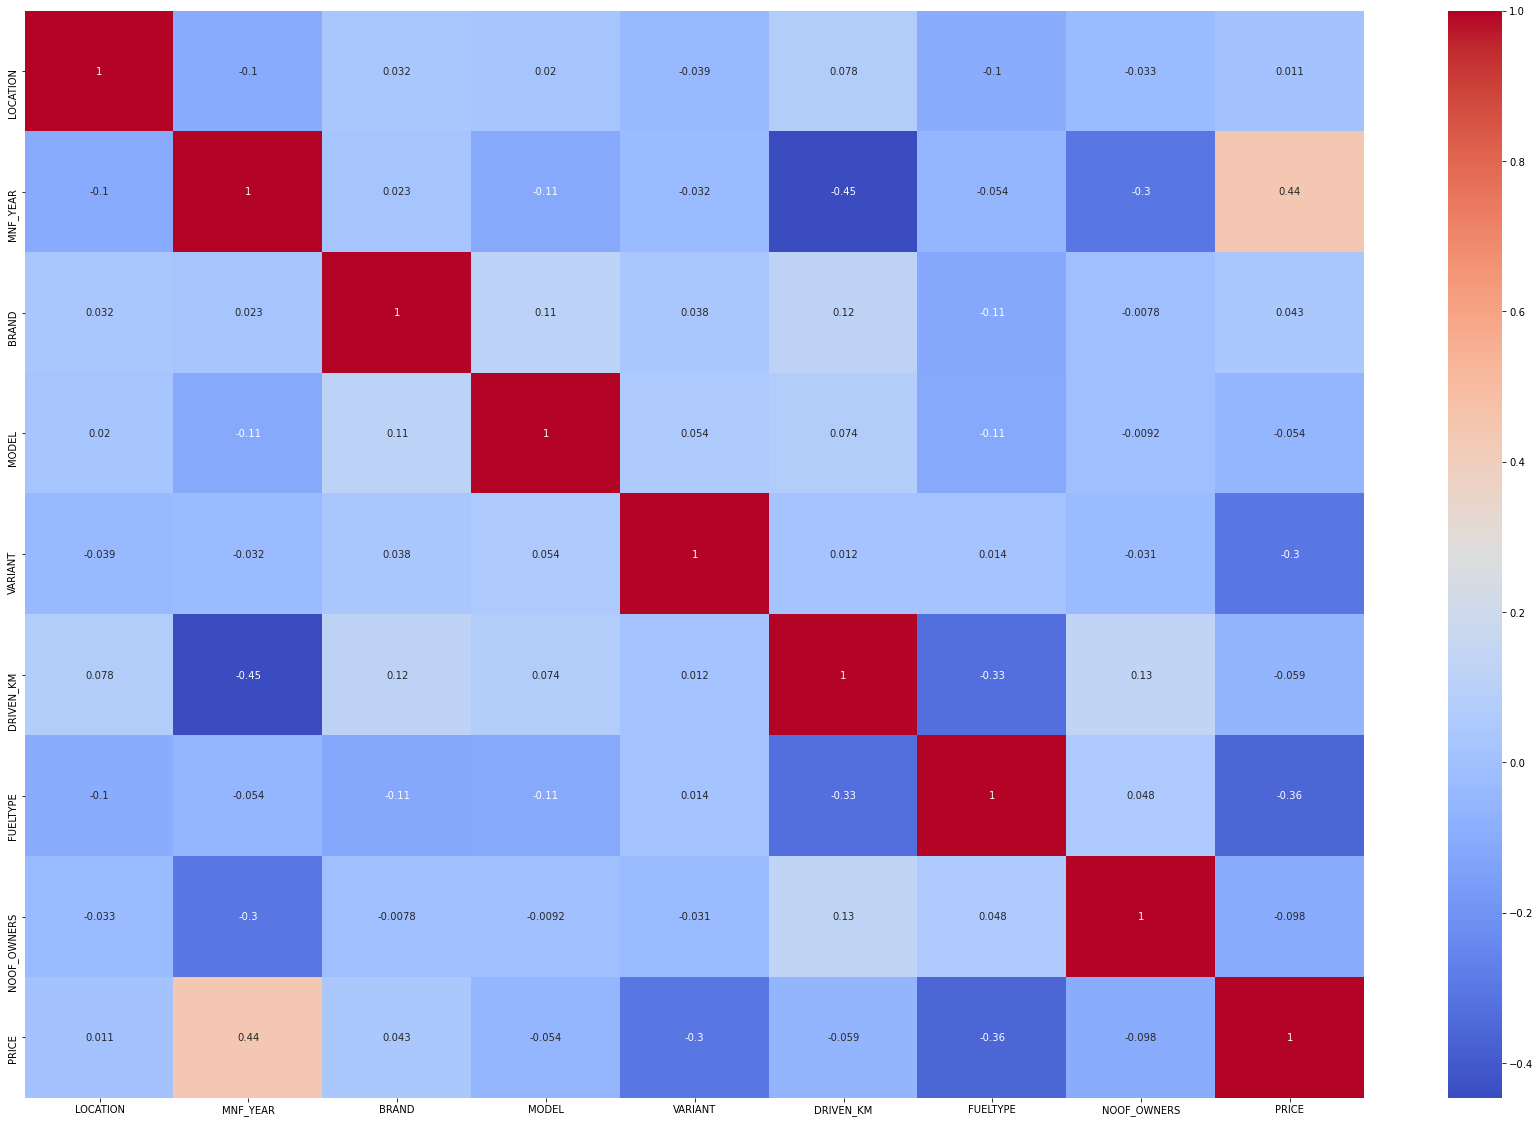

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

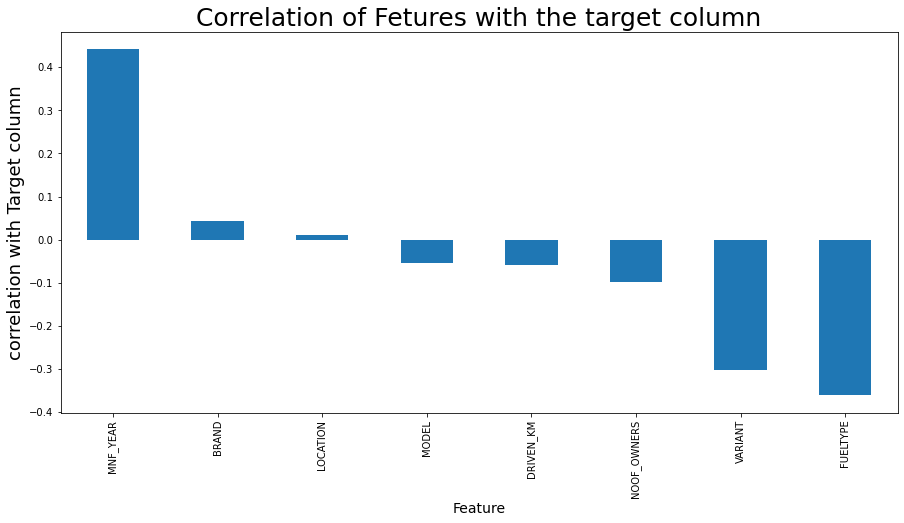

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.441745
BRAND,0.042707
LOCATION,0.010927
MODEL,-0.053804
DRIVEN_KM,-0.058510
NOOF_OWNERS,-0.098479
VARIANT,-0.301690
FUELTYPE,-0.361169


In [21]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

### Key Observations:
   1. From above we can clearly see that MNF_YEAR is postivly correlated to PRICE and FUEL_TYPE and VARIENT is negative corelated to PRICE

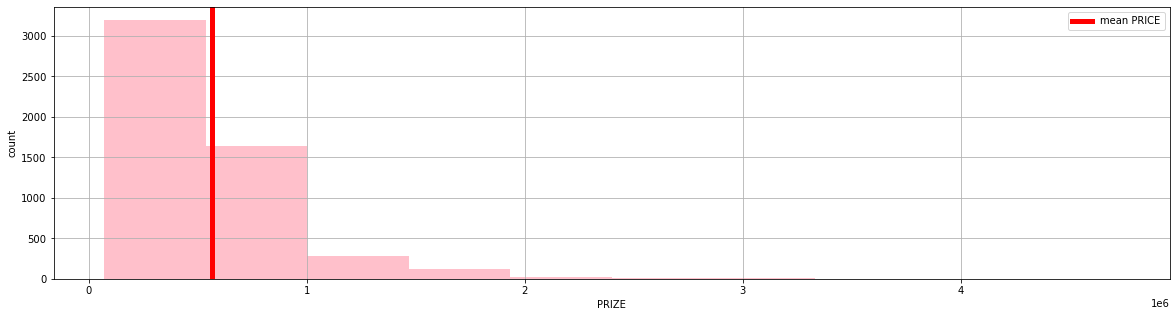

MATHEMATICAL SUMMARY OF PRIZE :
 count    5.278000e+03
mean     5.630879e+05
std      3.550280e+05
min      7.200000e+04
25%      3.340990e+05
50%      4.664990e+05
75%      6.929240e+05
max      4.725000e+06
Name: PRICE, dtype: float64


In [22]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

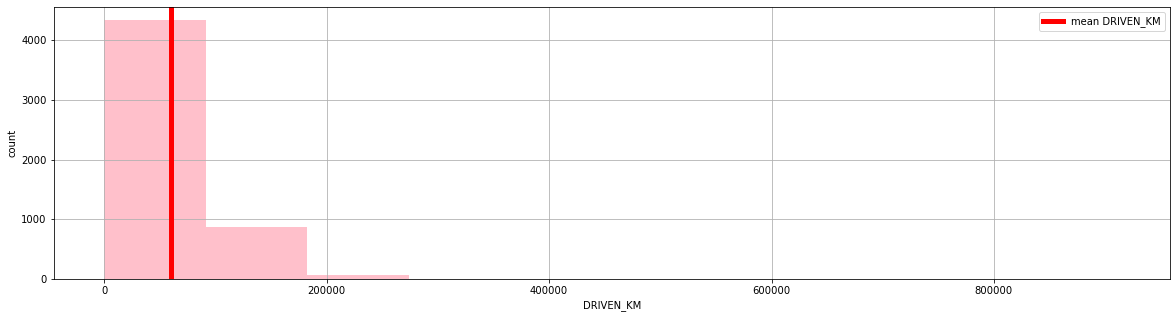

MATHEMATICAL SUMMARY OF PRIZE :
 count      5278.000000
mean      59953.128079
std       42236.593746
min         199.000000
25%       30314.000000
50%       52394.000000
75%       80254.500000
max      912380.000000
Name: DRIVEN_KM, dtype: float64


In [23]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

### Key observations:
1. Mean of the DRIVEN_KM is 59953.128079kms and the maximum KMS driven is  912380.000000kms.
2. Above we can understand that most of the Car comes to sellimg arround low kilometers driven.

### Multivariate Analysis:

In [24]:
DF1 = df.copy()

In [25]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

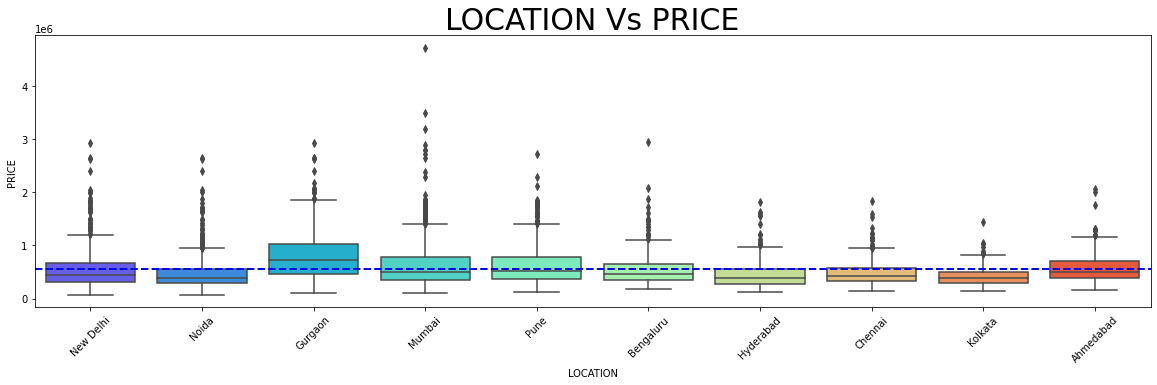

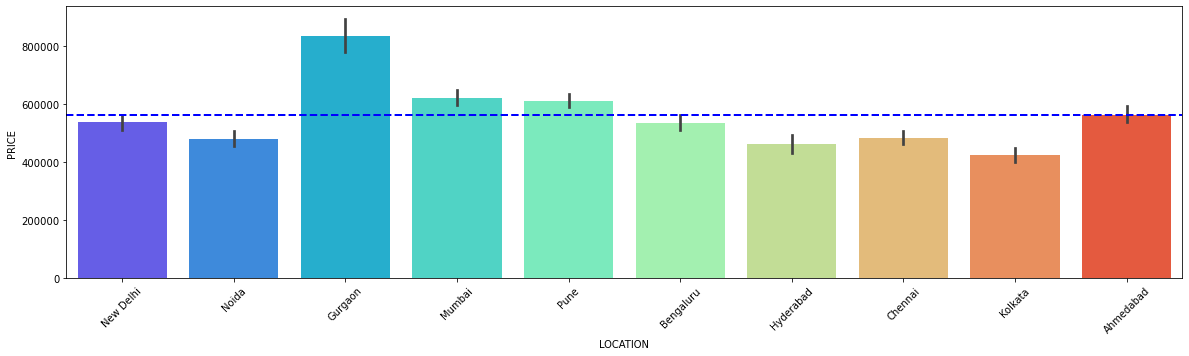

In [26]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. New Delhi, Noida, Gurgaon have the costiliest cars and Mumbai, Pune, Ahmedabad have most cars being sold.
2. We have Bengaluru, Hyderabad, Chennai, Kolkata have least cars being sold and also comprativly cheaper. 

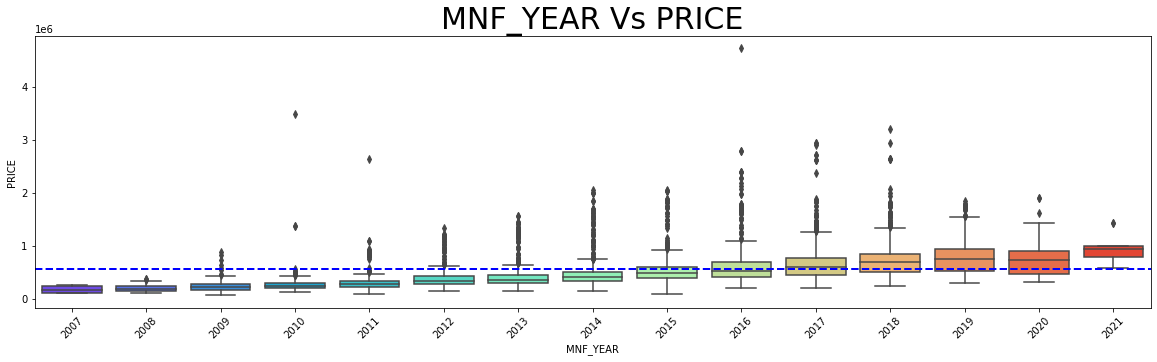

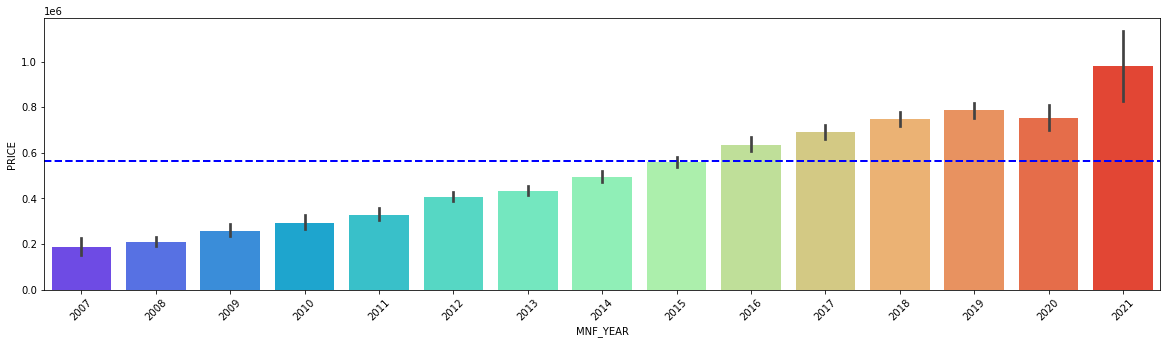

In [27]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. 2019, 2020, 2021 model are being sold higher in PRICE and also above average PRICE.
2. Above we can understand thatcars sold in lesser kms driven and also in lesser years used are sold in high price.

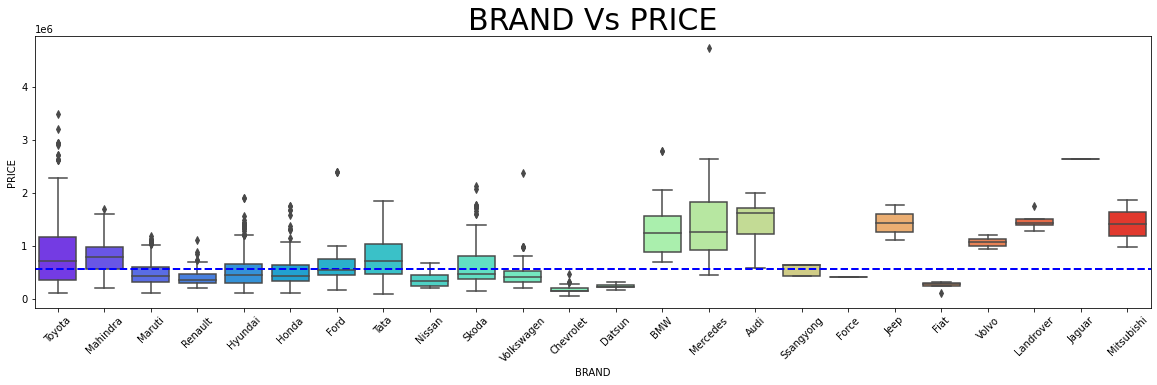

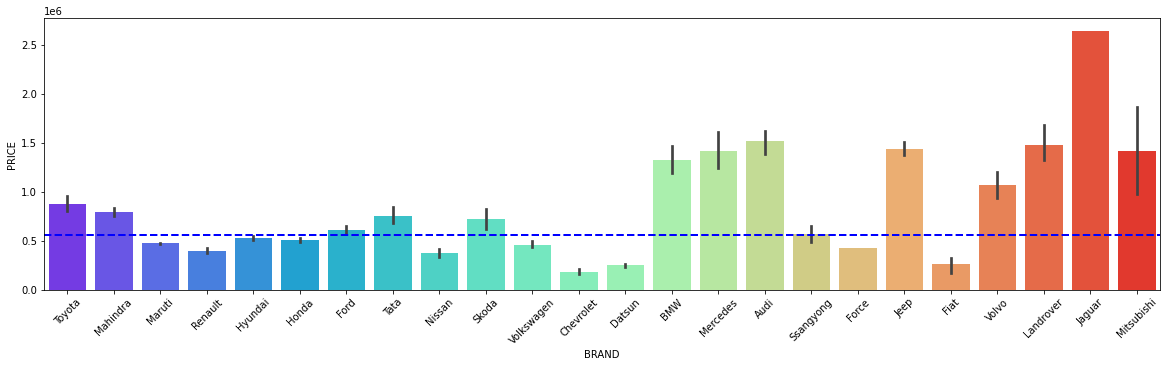

In [28]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. When comes to the Brand Land rover are being the costliest in country followed by Jaguar
2. And most of the other brands including most of the foreign brands are below the PRICE mean line

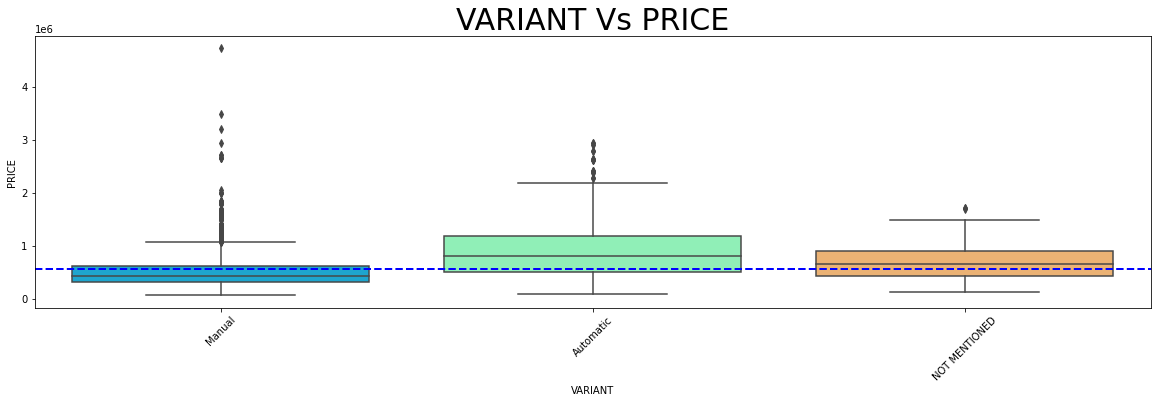

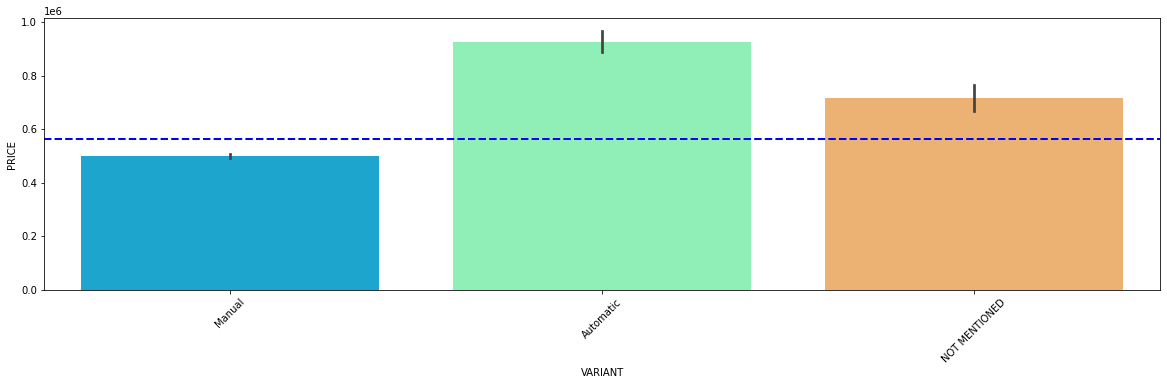

In [29]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. We can see that the automatic engines are costliest in the market. And also most costilier cars comes in Automatic Drift.

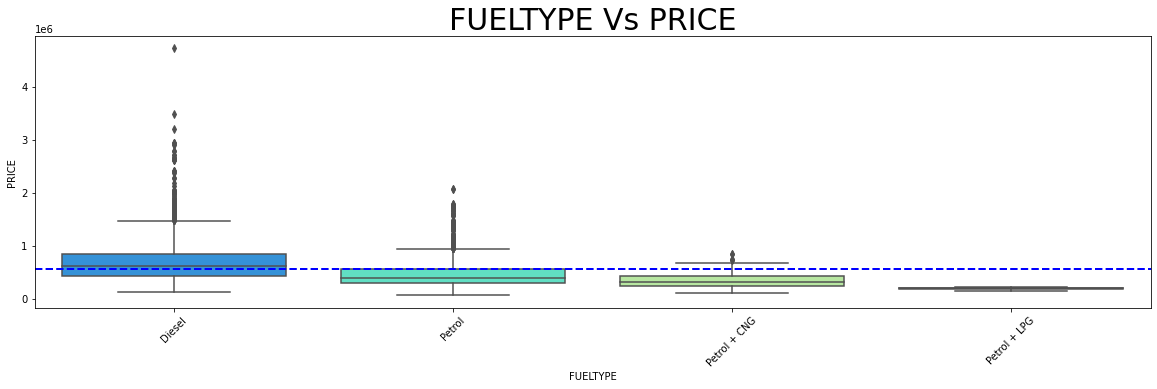

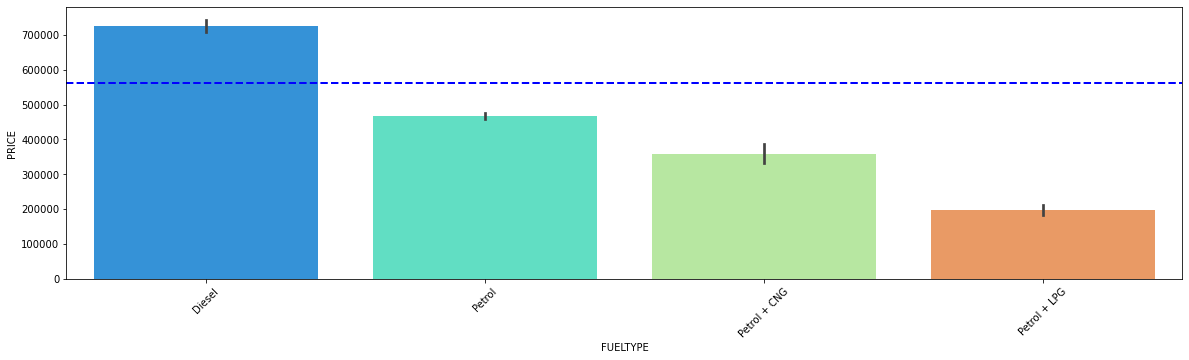

In [30]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. Diesel being the chepeast and most efficient fuel type, and so the Desiel engines are being the costiliest fuel types.
2. Petrol bend second prefered followed by CNG and LPG fuel types.

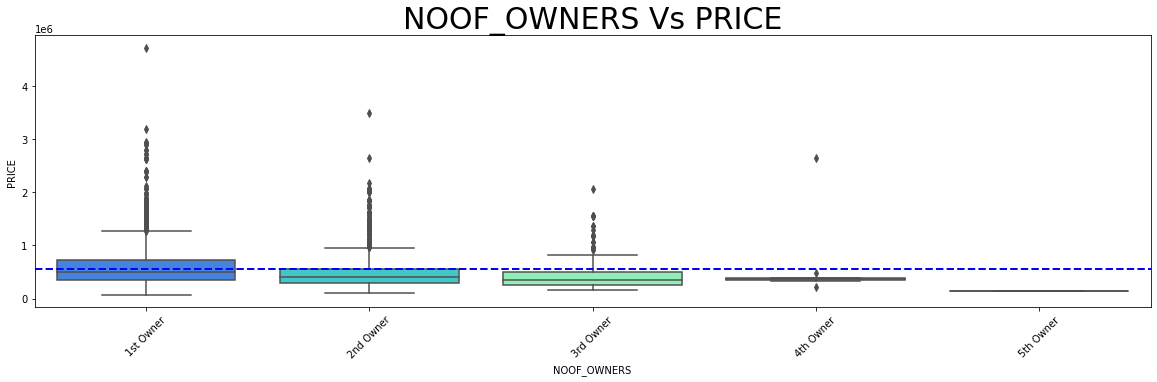

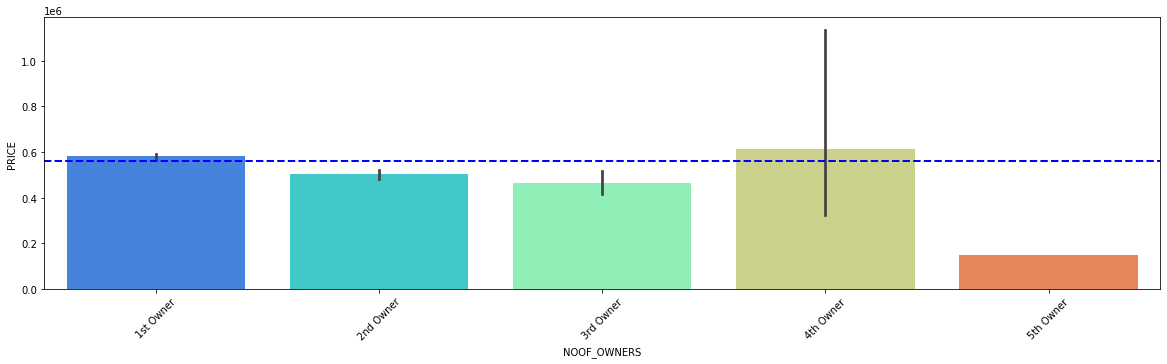

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observation:
1. 1st owner cars are costilest followed by second and third. 


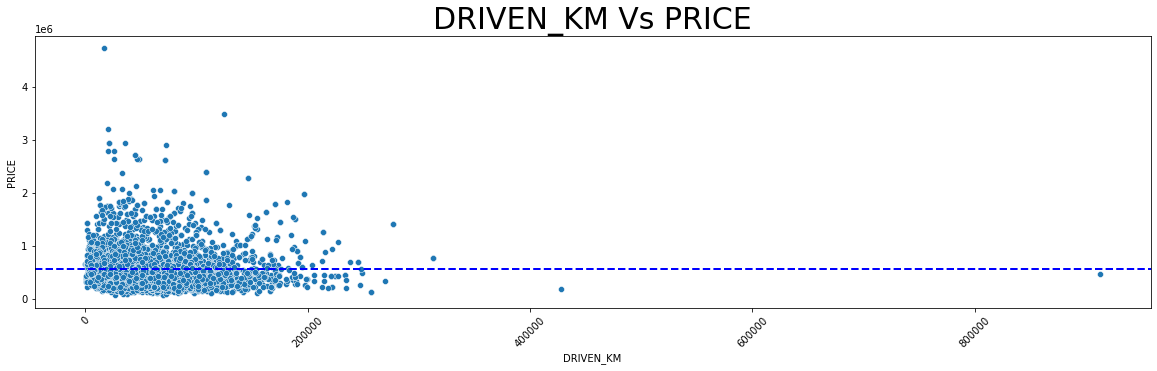

In [32]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

### Key Observations:
1. The lesser kms driven are evidently sold costilier. 

## Data Pre-Processing.

### Lets observe the skewness and outliers in the Data.

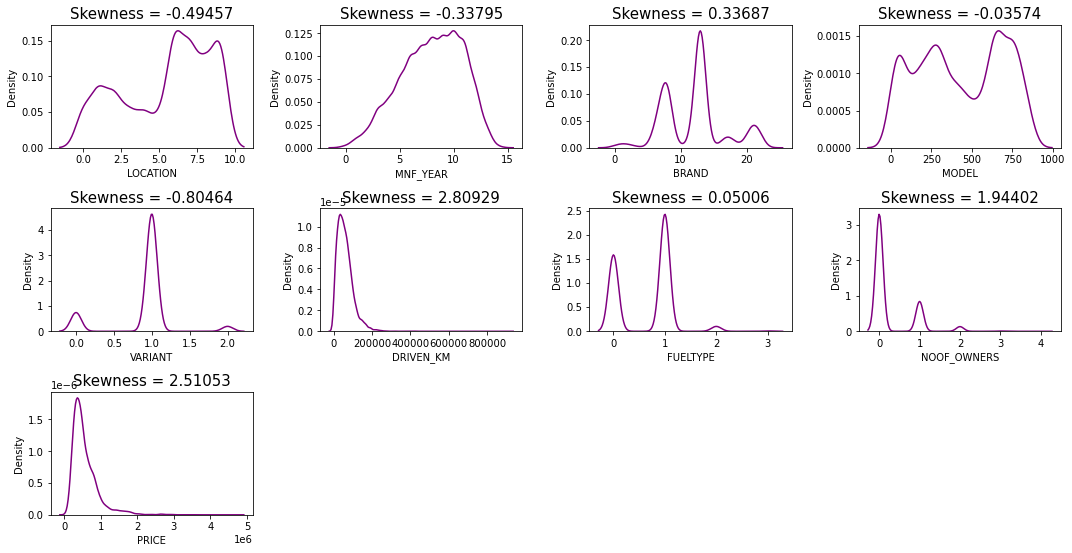

In [33]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

Lets also see the Outliers mathematically.

In [34]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [35]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (5278, 9)
After Removing outliers (4925, 9)
The percentage of data loss 6.535869041887338%


We have many outliers and we also have skewness in the data. Because its more, correcting them will have loss in the data orr data will be deformed. So we are deciding to work with the same.

In [36]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [37]:
x_1

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
0,7,12,21,434,1,31235,0,0
1,7,8,12,683,0,65766,0,0
2,7,8,13,325,1,65754,0,0
3,7,12,17,676,2,48151,1,0
4,7,11,13,748,1,28944,0,0
...,...,...,...,...,...,...,...,...
7828,0,13,8,702,1,9730,1,0
7829,0,13,13,746,1,10172,1,0
7830,0,11,13,283,1,11995,1,0
7831,0,9,13,755,1,50845,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

###  Model Building


### Selecting parameters for training

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 46.20590573998442 found on randomstate 217


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model

In [42]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [43]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.3715827021663747

ERROR:
MEAN ABSOLUTE ERROR:  169484.89290286033
MEAN SQUARED ERROR:  61095993580.491325
ROOT MEAN SQUARED ERROR : 247176.03763409454
R2 SCORE:  0.4620590573998442
**********************************************************************************************************



Score of Lasso() is: 0.37158270209971545

ERROR:
MEAN ABSOLUTE ERROR:  169484.42363613032
MEAN SQUARED ERROR:  61096008317.61951
ROOT MEAN SQUARED ERROR : 247176.06744508966
R2 SCORE:  0.4620589276416692
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.3715826773559785

ERROR:
MEAN ABSOLUTE ERROR:  169476.4739212457
MEAN SQUARED ERROR:  61096811313.61706
ROOT MEAN SQUARED ERROR : 247177.69177985511
R2 SCORE:  0.4620518573838911
**********************************************************************************************************



Score of ElasticNet() is:

In [44]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [ 0.29156889  0.36434209  0.37317145  0.42668562 -0.01296989]
MEAN OF SCORE is : 0.28855963190427913
Standard Deviation : 0.15678650300810423
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [ 0.29157161  0.3643404   0.37317116  0.42668628 -0.01295481]
MEAN OF SCORE is : 0.28856292856248267
Standard Deviation : 0.1567806340571516
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [ 0.2916058   0.36430737  0.37315685  0.42670066 -0.01277973]
MEAN OF SCORE is : 0.2885981905408061
Standard Deviation : 0.1567112222513898
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.29710542 0.28301299 0.3167903  0.39398487 0.14065909

In [45]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.979473,0.846081,0.060980,56120.686258,1.029651e+10,101471.732170,0.909341
6,DecisionTreeRegressor,1.000000,0.674970,0.153572,65336.926515,2.074780e+10,144040.981767,0.817319
5,KNeighborsRegressor,0.736773,0.527559,0.078969,120858.744697,4.047456e+10,201182.894018,0.643628
2,Ridge,0.371583,0.288598,0.156711,169476.473921,6.109681e+10,247177.691780,0.462052
1,Lasso,0.371583,0.288563,0.156781,169484.423636,6.109601e+10,247176.067445,0.462059
0,LinearRegression,0.371583,0.288560,0.156787,169484.892903,6.109599e+10,247176.037634,0.462059
3,ElasticNet,0.332178,0.286311,0.082298,174410.408951,6.752313e+10,259852.126888,0.405469
7,AdaBoostRegressor,0.156123,0.133558,0.291967,271472.673978,1.082516e+11,329016.146981,0.046861
4,SVR,-0.075413,-0.082556,0.070046,231944.612421,1.210502e+11,347922.647047,-0.065828


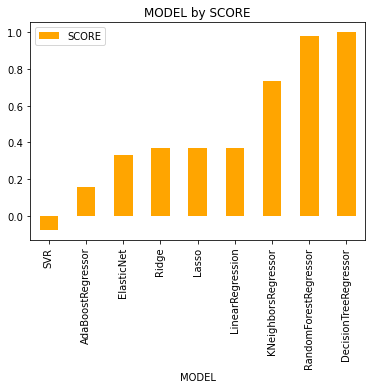

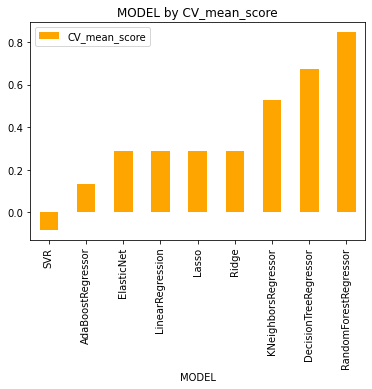

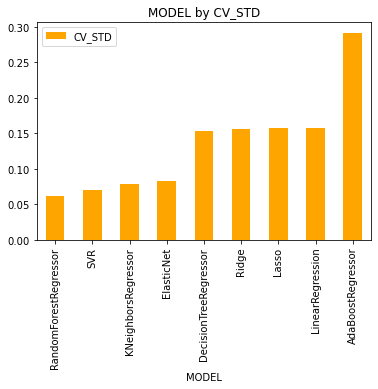

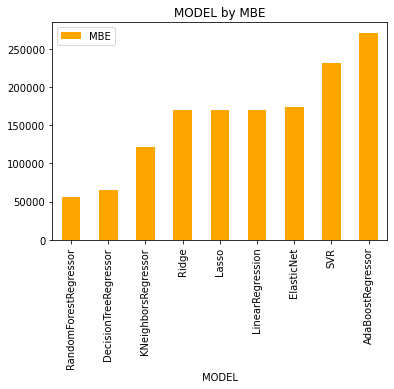

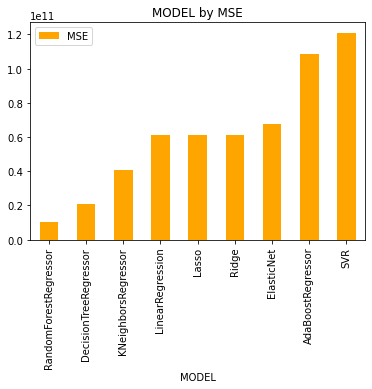

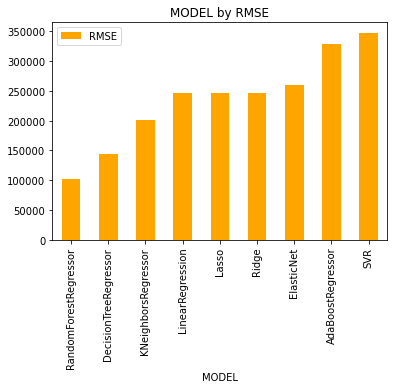

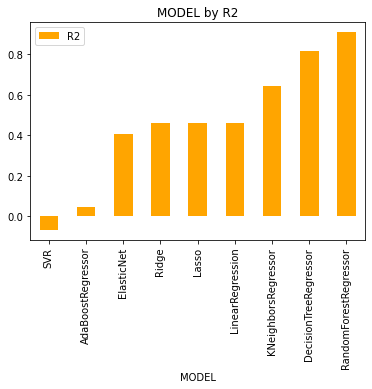

In [46]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.78 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [47]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

567941.8538175847

In [48]:
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
predm=rf.predict(x_test)

In [50]:
predm

array([ 606545.15, 1019354.18,  272612.  , ...,  307986.05,  368689.03,
        181088.32])

In [51]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.9093407721651396, 0.9794733668092898)

In [52]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Model Evaluation

### Hyper Parameter Tuning.

In [53]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [54]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [55]:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [56]:
reg_final_model = grid_search.best_estimator_

In [57]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [58]:
grid_search.best_score_

0.8311132678072493

In [59]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9811838140777055, 0.9801524357837433)

#### Saving the final model

In [60]:
import joblib
joblib.dump(reg_final_model,"CARPRICE_PRED.obj")

['CARPRICE_PRED.obj']

### Summary and Conclusion : 

> We have Hyper parameter tuned the model and improved the model score upto 98% with the Grid search cv score of 83.11%

1. The above model will help our seller to predict the Price of the user cars, and also will helps him to understand based on what factors the the Car Price is decided.